# Exploration of FEMA National Flood Insurance Program (NFIP) data

In [1]:
# Python 3
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

# from functools import reduce
# import itertools

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import missingno as msno

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)
print('missingno version:', msno.__version__)
# print('scikit-learn version:', sklearn.__version__)

numpy version: 1.19.4
pandas version: 1.1.4
matplotlib version: 3.3.3
seaborn version: 0.9.0
missingno version: 0.4.2


In [3]:
# Import data
df_raw = pd.read_csv('/homevol/sroe459/Data/FEMA/FIMA_NFIP_Redacted_Claims-v1.csv')

/homevol/sroe459/miniconda3/envs/sandbox_001/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495983 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

In [9]:
# Shape
nRow, nCol = df_raw.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,495,983 rows and 40 columns


In [11]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2040-01-01T05:00:00.000Z,2012-07-19T04:00:00.000Z,3507.13,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d038
1,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TRENTON,N,1.0,34021.0,NaN,1999-09-16T04:00:00.000Z,0.0,NaN,NaN,3.402100e+10,A04,0.0,40.2,-74.8,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-06T04:00:00.000Z,6389.31,NaN,NaN,0.0,1,0.0,NJ,166800.0,5900.0,1999,8638.0,1.0,5faad46bad3f68081876d046
2,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2016-07-07T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2027-01-01T05:00:00.000Z,2013-01-16T05:00:00.000Z,1638.01,NaN,NaN,0.0,R,0.0,MI,75000.0,30000.0,2016,48215.0,0.0,5faad46bad3f68081876d03f
3,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2022-01-01T05:00:00.000Z,2012-04-24T04:00:00.000Z,3651.57,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d043
4,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2016-07-08T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-01-01T05:00:00.000Z,2012-04-26T04:00:00.000Z,3836.59,NaN,NaN,0.0,R,0.0,MI,150000.0,60000.0,2016,48215.0,1.0,5faad46bad3f68081876d036
5,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,SCRANTON,N,1.0,42069.0,NaN,1985-09-27T04:00:00.000Z,0.0,NaN,NaN,4.206910e+10,A10,0.0,41.4,-75.7,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-05T04:00:00.000Z,3688.00,NaN,NaN,0.0,1,0.0,PA,35000.0,0.0,1985,18508.0,0.0,5faad46bad3f68081876d05b
6,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1997-10-10T04:00:00.000Z,2013-11-08T05:00:00.000Z,8855.33,NaN,NaN,1.0,7,0.0,MI,20000.0,8000.0,2014,48215.0,1.0,5faad46bad3f68081876d05a
7,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,DES ARC,N,1.0,5117.0,NaN,2011-05-02T04:00:00.000Z,1.0,NaN,NaN,5.117460e+09,A,0.0,35.0,-91.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1957-09-05T04:00:00.000Z,2007-11-06T05:00:00.000Z,34500.00,NaN,NaN,0.0,1,0.0,AR,34500.0,0.0,2011,72040.0,1.0,5faad46bad3f68081876d03a
8,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2019-05-01T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2045-01-01T05:00:00.000Z,2013-08-26T04:00:00.000Z,5071.85,1024.87,NaN,0.0,7,0.0,MI,150000.0,60000.0,2019,48215.0,1.0,5faad46bad3f68081876d047
9,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LA PORTE,N,1.0,48201.0,7.0,2007-08-17T04:00:00.000Z,0.0,NaN,NaN,4.820134e+10,X,0.0,29.7,-95.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1958-01-01T05:00:00.000Z,2007-06-24T04:00:00.000Z,17934.47,6574.71,NaN,0.0,7,0.0,TX,100000.0,40000.0,2007,77571.0,1.0,5faad46bad3f68081876d063


In [12]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495973,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,VEGA BAJA,N,1.0,72145.0,NaN,2012-11-12T05:00:00.000Z,0.0,1.0,NaN,7.214556e+10,A07,0.0,18.4,-66.4,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,7536.31,NaN,NaN,0.0,1,0.0,PR,62400.0,0.0,2012,693.0,1.0,5faad640ad3f6808189ce5fd
2495974,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CANOVANAS,N,1.0,72029.0,NaN,2004-09-15T04:00:00.000Z,0.0,1.0,NaN,7.202910e+10,AE,0.0,18.4,-65.9,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-16T05:00:00.000Z,6981.20,NaN,NaN,0.0,1,0.0,PR,78000.0,0.0,2004,729.0,1.0,5faad640ad3f6808189ce5fe
2495975,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,CAMBRIDGE,N,1.0,24019.0,6.0,2003-09-18T04:00:00.000Z,1.0,NaN,NaN,2.401997e+10,AE,0.0,38.6,-76.3,NaN,NaN,NaN,2.0,0.0,50.0,1.0,1958-07-01T04:00:00.000Z,2001-12-14T05:00:00.000Z,6018.95,NaN,NaN,0.0,1,0.0,MD,78000.0,0.0,2003,21613.0,0.0,5faad640ad3f6808189ce603
2495976,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MIAMI,N,1.0,12086.0,5.0,1999-10-15T04:00:00.000Z,0.0,2.0,NaN,1.208602e+10,AH,0.0,25.7,-80.4,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-09-08T04:00:00.000Z,5999.49,NaN,NaN,0.0,9,0.0,FL,65400.0,0.0,1999,33183.0,0.0,5faad640ad3f6808189ce60c
2495977,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,RODANTHE,N,1.0,37055.0,7.0,1999-10-16T04:00:00.000Z,0.0,NaN,NaN,3.705597e+10,AE,0.0,35.6,-75.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1976-01-01T05:00:00.000Z,1999-10-13T04:00:00.000Z,1811.19,NaN,NaN,0.0,1,0.0,NC,5000.0,0.0,1999,27968.0,1.0,5faad640ad3f6808189ce60e
2495978,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PHILADELPHIA,N,1.0,42017.0,NaN,1999-09-16T04:00:00.000Z,0.0,2.0,NaN,4.201710e+10,AE,0.0,40.2,-75.1,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-03-05T05:00:00.000Z,5544.25,NaN,NaN,0.0,9,0.0,PA,30800.0,0.0,1999,18976.0,0.0,5faad640ad3f6808189ce613
2495979,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAUDERHILL,N,1.0,12011.0,7.0,1999-05-25T04:00:00.000Z,0.0,2.0,NaN,1.201106e+10,AH,0.0,26.2,-80.2,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-02-24T05:00:00.000Z,NaN,NaN,NaN,0.0,9,0.0,FL,86100.0,0.0,1999,33313.0,0.0,5faad640ad3f6808189ce618
2495980,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,ORTING,N,1.0,53053.0,2.0,2006-11-06T05:00:00.000Z,0.0,NaN,NaN,5.305307e+10,C,0.0,47.1,-122.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1980-07-01T04:00:00.000Z,2001-12-07T05:00:00.000Z,11538.31,1977.23,NaN,0.0,7,0.0,WA,150000.0,60000.0,2006,98360.0,0.0,5faad640ad3f6808189ce629
2495981,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAFAYETTE,N,1.0,22055.0,8.0,1993-01-21T05:00:00.000Z,0.0,NaN,NaN,2.205500e+10,B,0.0,30.2,-92.0,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1982-03-30T05:00:00.000Z,1992-09-16T04:00:00.000Z,4972.00,NaN,NaN,1.0,1,0.0,LA,185000.0,60000.0,1993,70503.0,0.0,5faad640ad3f6808189ce634
2495982,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HOMOSASSA,N,1.0,12017.0,NaN,1993-03-13T05:00:00.000Z,0.0,NaN,NaN,1.201745e+10,A,0.0,28.8,-82.6,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1974-07-01T04:00:00.000Z,1991-07-03T04:00:00.000Z,7699.52,NaN,NaN,0.0,1,0.0,FL,60000.0,0.0,1993,34448.0,0.0,5faad640ad3f6808189ce63b


## Location

In [13]:
# Check missing values in latitude
df_raw['latitude'].isnull().value_counts()

False    2453803
True       42180
Name: latitude, dtype: int64

In [14]:
# Check missing values in latitude
df_raw['longitude'].isnull().value_counts()

False    2453803
True       42180
Name: longitude, dtype: int64

In [19]:
# Remove instances with missing latitude
df = df_raw.dropna(axis=0, subset=['latitude'])

In [21]:
# Shape
nRow, nCol = df.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,453,803 rows and 40 columns


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

# Event date

In [26]:
# Year of loss
df['yearOfLoss'].value_counts()

2005    277216
2012    175922
2017    147810
2008     97042
2011     96657
2016     86094
1998     83492
1979     81182
1995     79510
2004     76004
1999     68198
1996     67820
1983     62609
1992     61295
2001     54566
1980     50603
1989     48078
2003     47814
1985     46957
1993     45280
2018     43258
2019     42552
1982     38583
1997     38096
2010     37841
2009     37758
1991     36201
1984     34898
2015     34661
2002     34522
1978     34247
2020     34101
2006     29665
1981     28974
1994     28572
2007     28369
2013     24069
2000     23283
1990     18978
2014     18878
1987     17640
1986     17400
1988     11539
1977      5450
1976        66
1975        37
1974         9
1973         7
Name: yearOfLoss, dtype: int64

# Select points for 2005 event

In [28]:
df_2005 = df[df['yearOfLoss'] == 2005]

In [30]:
# Shape
nRow, nCol = df_2005.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 277,216 rows and 40 columns


In [29]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277216 entries, 116 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               277216 non-null  float64
 1   asOfDate                                    277216 non-null  object 
 2   baseFloodElevation                          107165 non-null  float64
 3   basementEnclosureCrawlspace                 33449 non-null   float64
 4   reportedCity                                277208 non-null  object 
 5   condominiumIndicator                        277182 non-null  object 
 6   policyCount                                 277216 non-null  float64
 7   countyCode                                  276963 non-null  float64
 8   communityRatingSystemDiscount               228292 non-null  float64
 9   dateOfLoss                                  277216 non-null  object

<AxesSubplot:>

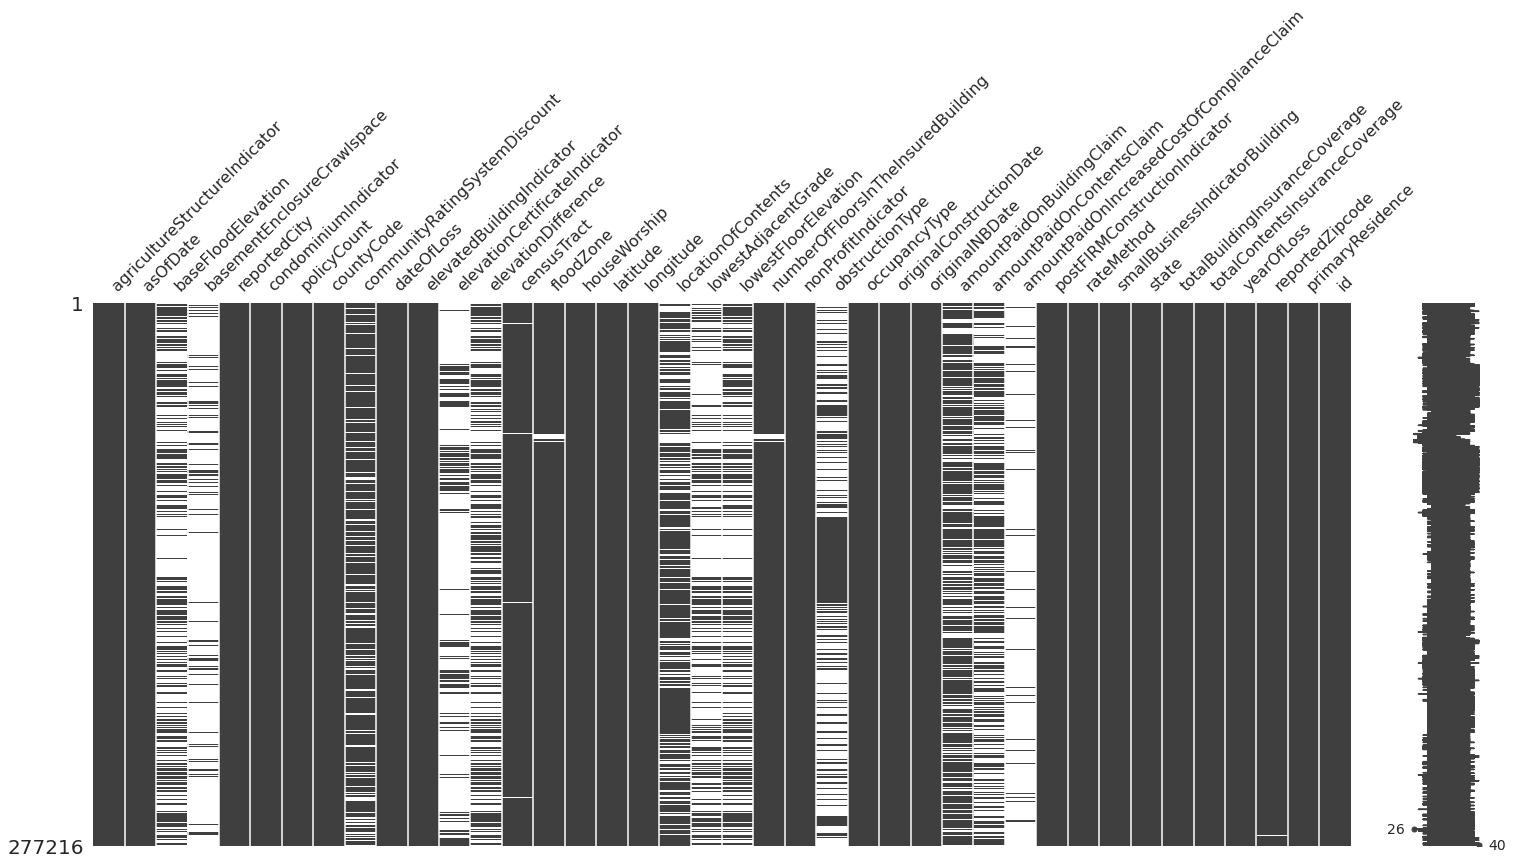

In [31]:
# Check missing values 
msno.matrix(df_2005)

In [32]:
with pd.option_context('display.max_columns', 100):
    display(df_2005.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
116,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TOMS RIVER,N,1.0,34029.0,7.0,2005-10-24T04:00:00.000Z,0.0,1.0,NaN,3.402972e+10,A05,0.0,39.9,-74.2,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1950-07-01T04:00:00.000Z,1984-11-23T05:00:00.000Z,6205.68,NaN,NaN,0.0,1,0.0,NJ,250000.0,100000.0,2005,8753.0,1.0,5faad46bad3f68081876d0b0
168,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,LITTLE FALLS,N,1.0,34031.0,6.0,2005-04-04T04:00:00.000Z,0.0,1.0,NaN,3.403115e+10,A06,0.0,40.9,-74.2,2.0,NaN,NaN,2.0,0.0,NaN,1.0,1950-07-01T04:00:00.000Z,1984-12-24T05:00:00.000Z,198.29,NaN,NaN,0.0,1,0.0,NJ,36600.0,12200.0,2005,7424.0,1.0,5faad46bad3f68081876d0dc
376,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,EASTON,N,1.0,42095.0,NaN,2005-04-03T05:00:00.000Z,0.0,1.0,NaN,4.209501e+10,B,0.0,40.7,-75.2,2.0,NaN,NaN,2.0,0.0,NaN,2.0,1950-07-01T04:00:00.000Z,1984-12-17T05:00:00.000Z,39920.53,6752.30,NaN,0.0,1,0.0,PA,170000.0,35900.0,2005,18042.0,1.0,5faad46bad3f68081876d17c
378,0.0,2020-10-27T17:56:33.967Z,NaN,NaN,LINCOLN PARK,N,1.0,34027.0,5.0,2005-04-03T05:00:00.000Z,0.0,1.0,NaN,3.402704e+10,A08,0.0,40.9,-74.3,4.0,NaN,NaN,2.0,0.0,NaN,1.0,1950-07-01T04:00:00.000Z,1984-12-24T05:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,NJ,35000.0,4000.0,2005,7035.0,0.0,5faad46bad3f68081876d18e
421,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,TINICUM,N,1.0,NaN,NaN,2005-04-03T05:00:00.000Z,0.0,1.0,NaN,NaN,B,0.0,40.5,-75.1,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2020-07-01T04:00:00.000Z,1985-02-23T05:00:00.000Z,5804.15,111.19,NaN,0.0,1,0.0,PA,122300.0,25200.0,2005,18972.0,1.0,5faad46bad3f68081876d1e5
453,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,STOCKTON,N,1.0,34019.0,NaN,2005-04-03T05:00:00.000Z,0.0,NaN,NaN,3.401901e+10,AE,0.0,40.4,-75.0,NaN,NaN,NaN,3.0,0.0,NaN,1.0,1967-07-01T04:00:00.000Z,1996-02-02T05:00:00.000Z,11857.56,NaN,NaN,0.0,1,0.0,NJ,82500.0,0.0,2005,8559.0,1.0,5faad46bad3f68081876d208
460,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TINICUM,N,1.0,NaN,NaN,2005-04-03T05:00:00.000Z,0.0,1.0,NaN,NaN,B,0.0,40.5,-75.1,3.0,NaN,NaN,2.0,0.0,NaN,4.0,2018-07-01T04:00:00.000Z,1985-02-22T05:00:00.000Z,17228.70,NaN,NaN,0.0,1,0.0,PA,37200.0,13300.0,2005,19029.0,0.0,5faad46bad3f68081876d200
546,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,BANGOR,N,1.0,42095.0,NaN,2005-04-04T04:00:00.000Z,1.0,1.0,NaN,4.209502e+10,A06,0.0,40.8,-75.1,NaN,NaN,NaN,3.0,0.0,60.0,1.0,1957-07-01T04:00:00.000Z,1985-02-27T05:00:00.000Z,19300.00,NaN,NaN,0.0,1,0.0,PA,19500.0,0.0,2005,18013.0,0.0,5faad46bad3f68081876d241
589,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,LAMBERTVILLE,N,1.0,34019.0,7.0,2005-04-03T05:00:00.000Z,0.0,1.0,NaN,3.401901e+10,A16,0.0,40.4,-74.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1950-07-01T04:00:00.000Z,1985-01-25T05:00:00.000Z,15136.11,NaN,NaN,0.0,1,0.0,NJ,56400.0,0.0,2005,8530.0,0.0,5faad46bad3f68081876d29d
709,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,STOCKTON,N,1.0,34019.0,NaN,2005-04-04T04:00:00.000Z,0.0,NaN,NaN,3.401901e+10,A,0.0,40.4,-75.0,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1950-07-01T04:00:00.000Z,1985-02-11T05:00:00.000Z,63957.19,18900.00,NaN,0.0,1,0.0,NJ,120900.0,18900.0,2005,8559.0,1.0,5faad46bad3f68081876d316


In [33]:
with pd.option_context('display.max_columns', 100):
    display(df_2005.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495849,0.0,2020-11-01T23:58:45.858Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,2005-09-24T04:00:00.000Z,1.0,3.0,3.0,2.204503e+10,A,0.0,30.0,-91.9,4.0,8.6,12.0,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,2002-05-16T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,50000.0,0.0,2005,70560.0,1.0,5faad640ad3f6808189ce5a5
2495865,0.0,2020-11-01T23:58:45.858Z,9.0,NaN,MIAMI,N,1.0,12086.0,5.0,2005-08-25T04:00:00.000Z,0.0,NaN,1.0,1.208601e+10,AHB,0.0,25.6,-80.4,3.0,8.3,9.0,1.0,0.0,NaN,1.0,1990-01-01T05:00:00.000Z,2004-02-04T05:00:00.000Z,3541.59,1469.29,NaN,1.0,1,0.0,FL,153300.0,76700.0,2005,33186.0,1.0,5faad640ad3f6808189ce583
2495866,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PINECREST,N,1.0,12086.0,5.0,2005-08-25T04:00:00.000Z,0.0,NaN,NaN,1.208601e+10,AE,0.0,25.7,-80.3,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1959-01-01T05:00:00.000Z,2004-07-16T04:00:00.000Z,2396.44,NaN,NaN,0.0,1,0.0,FL,245000.0,100000.0,2005,33156.0,1.0,5faad640ad3f6808189ce58f
2495876,0.0,2020-11-01T23:58:45.858Z,6.0,NaN,DAVIE,N,1.0,12011.0,7.0,2005-10-24T04:00:00.000Z,0.0,NaN,4.0,1.201107e+10,AHB,0.0,26.1,-80.3,3.0,7.5,9.0,1.0,0.0,NaN,1.0,2001-05-01T04:00:00.000Z,2001-05-11T04:00:00.000Z,3189.65,NaN,NaN,1.0,1,0.0,FL,250000.0,100000.0,2005,33328.0,1.0,5faad640ad3f6808189ce5b2
2495896,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CAROLINA,N,1.0,72031.0,NaN,2005-08-25T04:00:00.000Z,0.0,NaN,NaN,7.203105e+10,A07,0.0,18.4,-66.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,PR,92700.0,0.0,2005,985.0,1.0,5faad640ad3f6808189ce600
2495917,0.0,2020-11-01T23:58:45.858Z,6.0,NaN,MIRAMAR,N,1.0,12011.0,8.0,2005-08-12T04:00:00.000Z,0.0,NaN,3.0,1.201111e+10,AHB,0.0,26.0,-80.4,3.0,8.2,9.0,1.0,0.0,NaN,1.0,2001-10-10T04:00:00.000Z,2003-11-16T05:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,FL,226300.0,92600.0,2005,33029.0,1.0,5faad640ad3f6808189ce61a
2495921,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NICEVILLE,N,1.0,12131.0,6.0,2005-08-26T04:00:00.000Z,0.0,NaN,NaN,1.213195e+10,X,0.0,30.5,-86.4,4.0,NaN,NaN,3.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2003-12-09T05:00:00.000Z,NaN,NaN,NaN,0.0,7,0.0,FL,250000.0,100000.0,2005,32578.0,0.0,5faad640ad3f6808189ce623
2495942,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MOUNT BETHEL,N,1.0,42095.0,NaN,2005-04-03T05:00:00.000Z,0.0,NaN,NaN,4.209502e+10,A20,0.0,40.9,-75.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,2040-07-01T04:00:00.000Z,2003-12-03T05:00:00.000Z,51253.77,11600.00,NaN,0.0,1,0.0,PA,66600.0,20000.0,2005,18343.0,1.0,5faad640ad3f6808189ce64e
2495961,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,MOUNT BETHEL,N,1.0,42095.0,NaN,2005-04-03T05:00:00.000Z,0.0,NaN,NaN,4.209502e+10,AE,0.0,40.9,-75.1,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-07-01T04:00:00.000Z,2003-12-08T05:00:00.000Z,32046.58,1870.00,NaN,0.0,1,0.0,PA,250000.0,38600.0,2005,18343.0,0.0,5faad640ad3f6808189ce652
2495971,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,9.0,2005-08-29T04:00:00.000Z,1.0,NaN,NaN,2.210304e+10,AE,0.0,30.3,-89.8,NaN,NaN,NaN,1.0,0.0,15.0,1.0,1974-01-01T05:00:00.000Z,2002-01-30T05:00:00.000Z,15381.76,NaN,NaN,0.0,1,0.0,LA,40000.0,0.0,2005,70460.0,1.0,5faad640ad3f6808189ce638


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

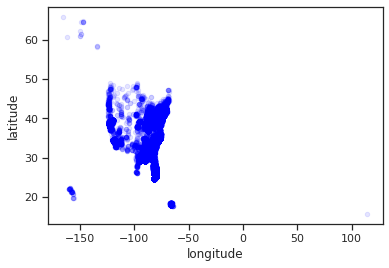

In [34]:
# Plot the instances
df_2005.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

Outliers?

In [35]:
df_2005['longitude'].describe()

count    277216.000000
mean        -88.476904
std           5.990759
min        -165.600000
25%         -90.100000
50%         -90.000000
75%         -89.100000
max         114.400000
Name: longitude, dtype: float64

In [38]:
#Explore single instance with Long = 114.4
df_2005[df_2005['longitude'] == 114.4]

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
885249,0.0,2020-11-01T23:58:45.858Z,1.0,0.0,NEW ORLEANS,N,1.0,NaN,8.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,25000.0,0.0,2005,70116.0,0.0,5faad4f0ad3f6808188452ea


In [39]:
#Drop single instance with Long = 114.4
df_2005 = df_2005[df_2005['longitude'] != 114.4]

In [40]:
df_2005['longitude'].describe()

count    277215.000000
mean        -88.477635
std           5.978365
min        -165.600000
25%         -90.100000
50%         -90.000000
75%         -89.100000
max         -64.700000
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

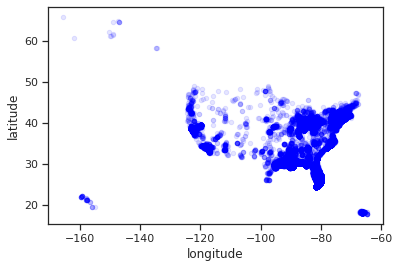

In [41]:
# Plot the instances
df_2005.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

In [42]:
df_2005['latitude'].describe()

count    277215.000000
mean         30.414383
std           3.236716
min          17.700000
25%          29.900000
50%          30.000000
75%          30.200000
max          65.900000
Name: latitude, dtype: float64

In [43]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277215 entries, 116 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               277215 non-null  float64
 1   asOfDate                                    277215 non-null  object 
 2   baseFloodElevation                          107164 non-null  float64
 3   basementEnclosureCrawlspace                 33448 non-null   float64
 4   reportedCity                                277207 non-null  object 
 5   condominiumIndicator                        277181 non-null  object 
 6   policyCount                                 277215 non-null  float64
 7   countyCode                                  276963 non-null  float64
 8   communityRatingSystemDiscount               228291 non-null  float64
 9   dateOfLoss                                  277215 non-null  object